In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split

iris = load_iris()


In [61]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [62]:
print(iris['filename'])


iris.csv


In [63]:
df = pd.DataFrame(data=iris.data, 
                  columns=iris.feature_names)

In [64]:
target = pd.DataFrame(data=iris.target, 
                  columns=['target'])

In [65]:
df = pd.concat([df,target])
df = df.fillna(0)
df['target']=df['target'].astype(int)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,2
146,0.0,0.0,0.0,0.0,2
147,0.0,0.0,0.0,0.0,2
148,0.0,0.0,0.0,0.0,2


In [76]:
tree = DecisionTreeClassifier(criterion='gini',
                                max_depth=3, random_state=42)

In [67]:
X = iris['data']
y = iris['target']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

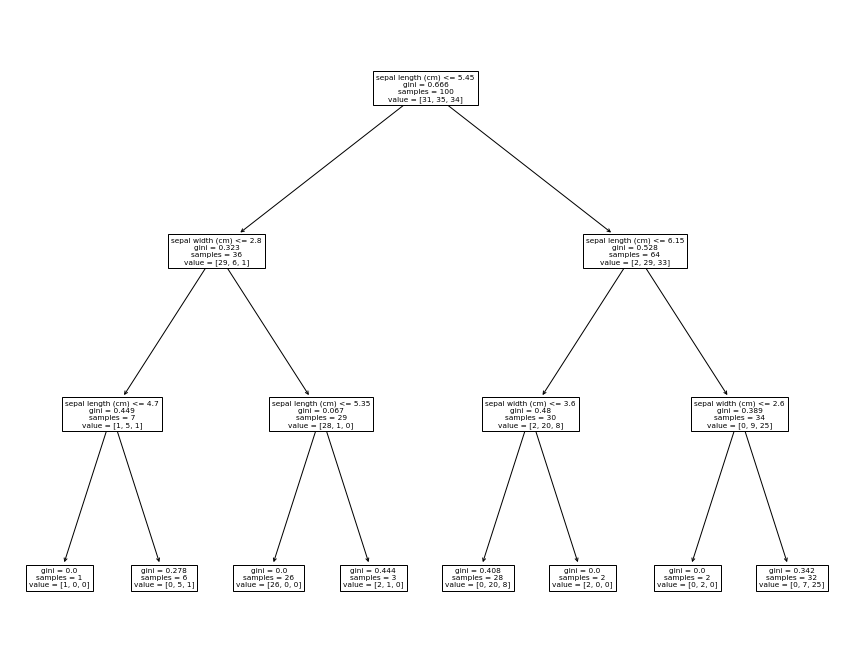

In [81]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree.fit(X_train,y_train)
plt.figure(figsize = (15,12))
plot_tree(tree,feature_names = iris['feature_names']);

In [82]:
y_pred_test = tree.predict(X_test)
y_pred_train = tree.predict(X_train)

In [71]:
from sklearn.metrics import  classification_report

In [83]:
print("Classification report for test data: \n", classification_report(y_test, y_pred_test))
print('-----------------------------------------------------------------------------------')
print("Classification report for train data: \n", classification_report(y_train, y_pred_train))

Classification report for test data: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.60      0.60      0.60        15
           2       0.65      0.69      0.67        16

    accuracy                           0.76        50
   macro avg       0.75      0.74      0.75        50
weighted avg       0.77      0.76      0.76        50

-----------------------------------------------------------------------------------
Classification report for train data: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.75      0.77      0.76        35
           2       0.78      0.74      0.76        34

    accuracy                           0.83       100
   macro avg       0.83      0.84      0.83       100
weighted avg       0.83      0.83      0.83       100



In [73]:
from mlxtend import plotting

def decision_regions(data, target, classifier, figsize=(15, 8)):
    plt.figure(figsize=figsize)
    plotting.plot_decision_regions(X=data, y=target, clf=classifier, legend=2)
    plt.scatter(data[:, 0], data[:, 1], c=["brg"[x] for x in target])

In [84]:
X = iris.data[:,:2]
y = iris.target

tree = DecisionTreeClassifier(criterion='gini',
                                max_depth=3, random_state=42).fit(X,y)

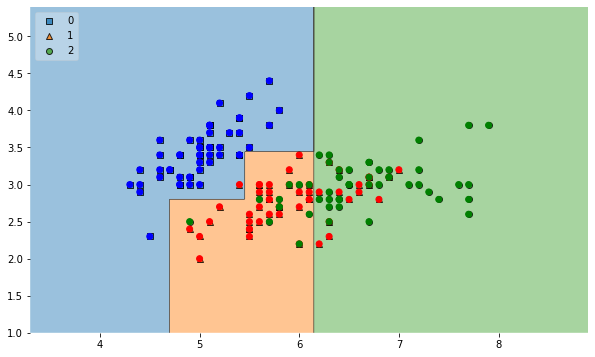

In [85]:
decision_regions(X, y, tree,figsize=(10, 6))

Comapre to Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr = LogisticRegression().fit(X_train,y_train)

y_pred_test_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

print("Classification report for test data: \n", classification_report(y_test, y_pred_test_lr))
print('-----------------------------------------------------------------------------------')
print("Classification report for train data: \n", classification_report(y_train, y_pred_train_lr))

Classification report for test data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.80      0.53      0.64        15
           2       0.67      0.88      0.76        16

    accuracy                           0.82        50
   macro avg       0.82      0.80      0.80        50
weighted avg       0.83      0.82      0.81        50

-----------------------------------------------------------------------------------
Classification report for train data: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.69      0.77      0.73        35
           2       0.74      0.68      0.71        34

    accuracy                           0.80       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.80      0.80      0.80       100

